In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("tooth.csv")
data.head()

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


In [2]:
data.isnull().any()

Unnamed: 0    False
len           False
supp          False
dose          False
dtype: bool

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,60.0,30.500000,17.464249,1.0,15.750,30.50,45.250,60.0
len,60.0,18.813333,7.649315,4.2,13.075,19.25,25.275,33.9
dose,60.0,1.166667,0.628872,0.5,0.500,1.00,2.000,2.0


In [5]:
data_copy = data.copy(deep = True)
data_copy[['Unnamed: 0','len','dose']] = data_copy[['Unnamed: 0','len','dose']].replace(0,np.NaN)
data_copy.isnull().sum()

Unnamed: 0    0
len           0
supp          0
dose          0
dtype: int64

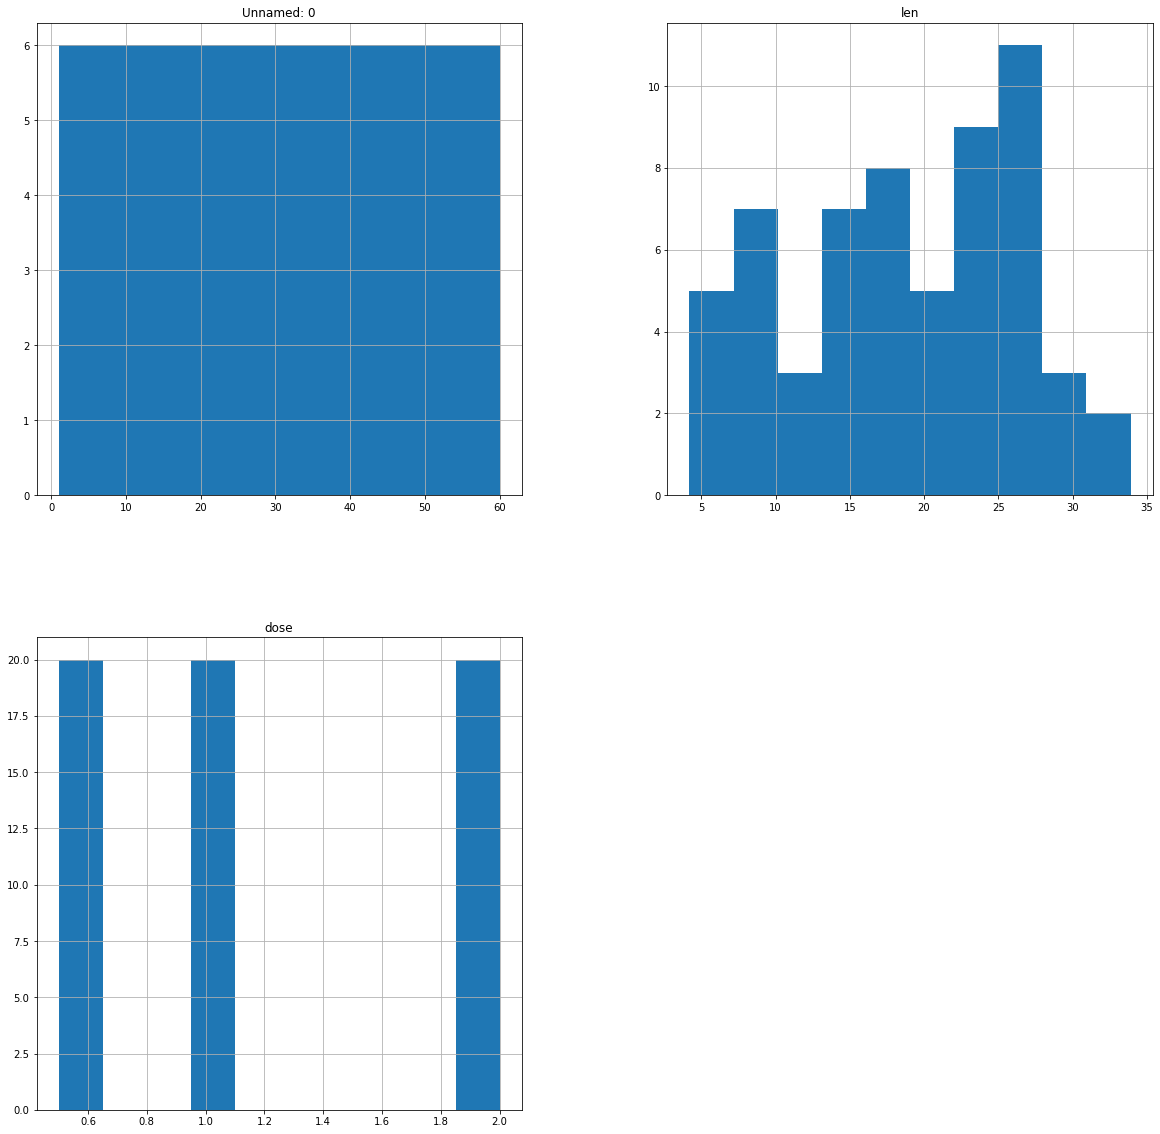

In [6]:
p = data.hist(figsize = (20,20))

In [7]:
data_copy['Unnamed: 0'].fillna(data_copy['Unnamed: 0'].mean(), inplace = True)
data_copy['len'].fillna(data_copy['len'].mean(), inplace = True)
data_copy['dose'].fillna(data_copy['dose'].median(), inplace = True)


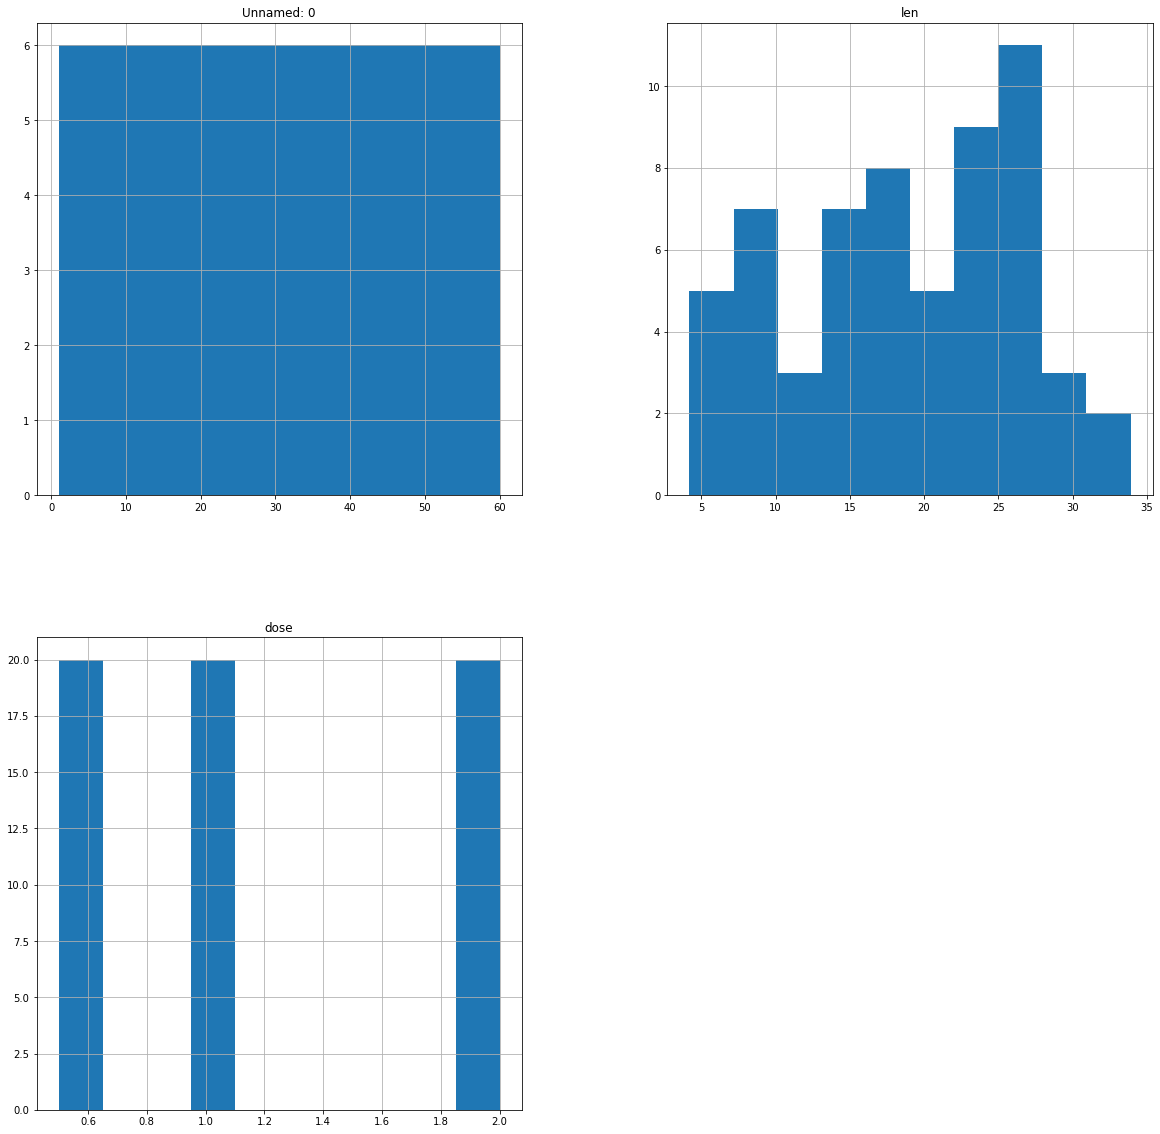

In [8]:
p = data_copy.hist(figsize = (20,20))

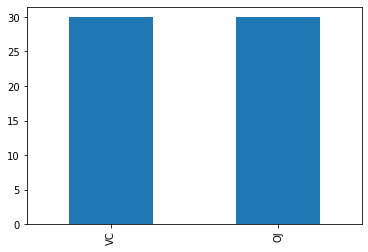

In [10]:
p=data.supp.value_counts().plot(kind="bar")

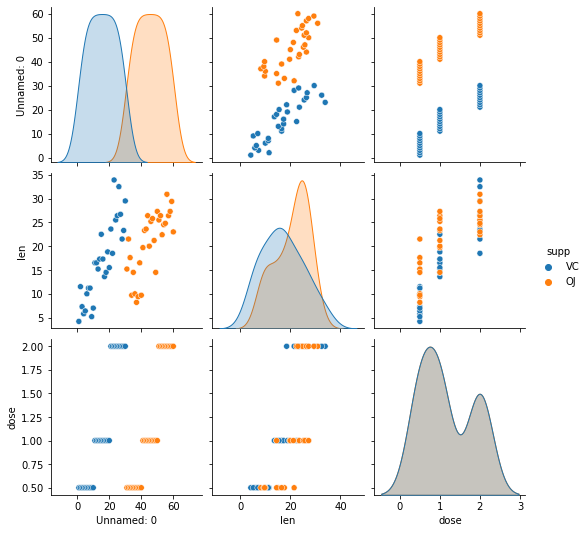

In [11]:
import seaborn as sns
p=sns.pairplot(data_copy, hue = 'supp')

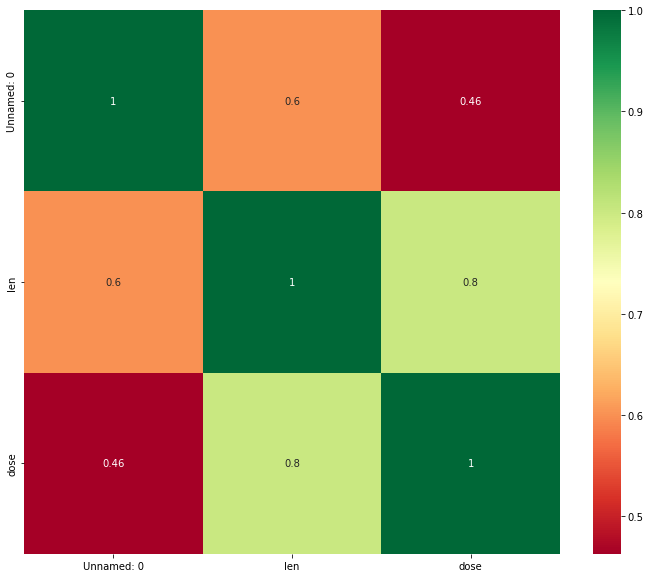

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10)) 
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  

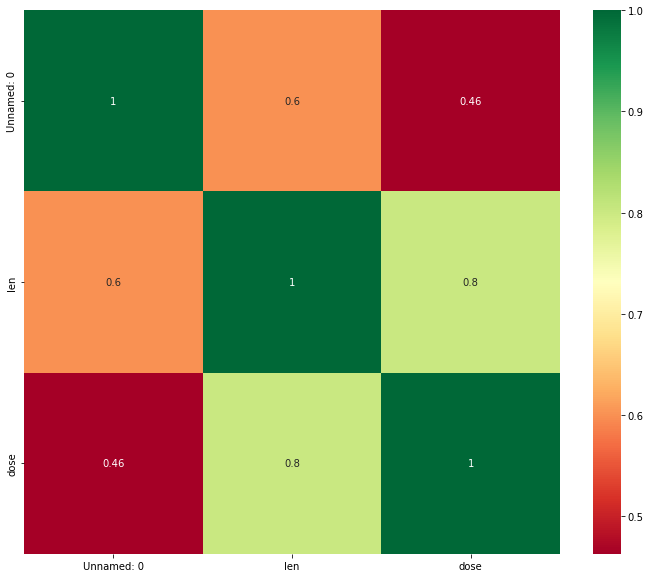

In [13]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy.drop(["supp"], axis =1),),columns=['Unnamed:0', 'len', 'dose'])

In [15]:
X.head()

,Unnamed:0,len,dose
0,-1.703420,-1.926533,-1.069045
1,-1.645677,-0.964145,-1.069045
2,-1.587934,-1.517848,-1.069045
3,-1.530191,-1.715598,-1.069045
4,-1.472448,-1.636498,-1.069045


In [16]:
y =data_copy.supp

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42, stratify=y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [19]:
max_test_score =max(test_scores)

In [20]:
test_score_index = [i for i, v in enumerate(test_scores) if v== max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score 100.0 % and k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


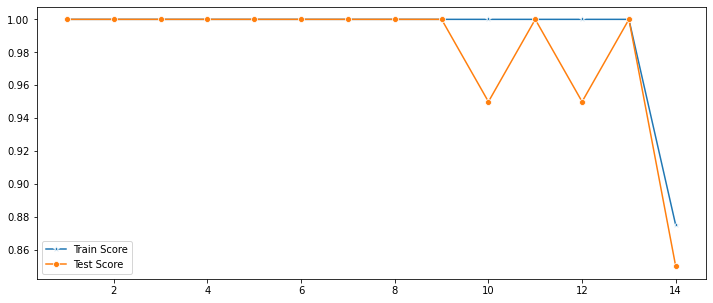

In [21]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [22]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

1.0

Text(0.5, 15.0, 'Predicted label')

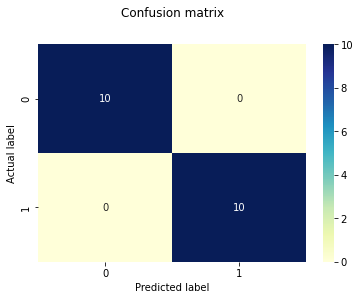

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          OJ       1.00      1.00      1.00        10
          VC       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

